In [208]:
#Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [209]:
file = "Resources/All_rest_2018.csv"
rest_df = pd.read_csv(file)
rest_df.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,NaN,24509.0,23.7,27638.0,22390.0,9821.0,40.070994
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,NaN,1715.0,27.7,41500.0,29812.0,655.0,38.192420
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,NaN,20926.0,38.0,55609.0,25477.0,2829.0,13.519067
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,NaN,55122.0,40.9,91966.0,51709.0,3641.0,6.605348
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,NaN,20884.0,38.4,42252.0,23465.0,3202.0,15.332312


In [210]:
#Create dataframe for Chipotle, McDonald's and YUM

chipotle_df = rest_df.loc[(rest_df['Name'] == "Chipotle Mexican Grill")]
mcdonalds_df = rest_df.loc[(rest_df['Name'] == "McDonald's")]
yum_df = rest_df.loc[(rest_df['Name'] == "YUM Brands")]

In [211]:
#Determine age bins for each restaurant

rest_df['Median Age'].min()
#min value = 19

#Create bins for each age group 

bins = [18, 25, 31, 36, 41, 46, 9999]
group_names = ["18-24", "25-30", "30-35", "36-40", "41-45", "46+"]

In [212]:
# Create Chipotle age groupings and percent of total

chipotle_df['Median Age Ranges'] = pd.cut(chipotle_df['Median Age'], bins, labels=group_names, include_lowest=True)

chipotle_age_group = chipotle_df.groupby('Median Age Ranges')

chipotle_age_count = chipotle_age_group.count()

chipotle_percent = (chipotle_age_count['Name']/chipotle_age_count['Name'].sum())*100

chipotle_age_df = pd.DataFrame({"Total Count": chipotle_age_count["Name"],
                       "Chipotle Percent": chipotle_percent})


In [213]:
# Create McDonald's age groupings

mcdonalds_df['Median Age Ranges'] = pd.cut(mcdonalds_df['Median Age'], bins, labels=group_names, include_lowest=True)

mcdonalds_age_group = mcdonalds_df.groupby('Median Age Ranges')

mcdonalds_age_count = mcdonalds_age_group.count()

mcdonalds_percent = (mcdonalds_age_count['Name']/mcdonalds_age_count['Name'].sum())*100

mcdonalds_age_df = pd.DataFrame({"Total Count": mcdonalds_age_count["Name"],
                       "McDonald's Percent": mcdonalds_percent})

In [214]:
# Create YUM age groupings

yum_df['Median Age Ranges'] = pd.cut(yum_df['Median Age'], bins, labels=group_names, include_lowest=True)

yum_age_group = yum_df.groupby('Median Age Ranges')

yum_age_count = yum_age_group.count()

yum_percent = (yum_age_count['Name']/yum_age_count['Name'].sum())*100

yum_age_df = pd.DataFrame({"Total Count": yum_age_count["Name"],
                       "Yum Percent": yum_percent})

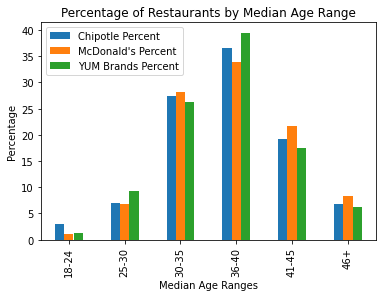

In [215]:
#Create new dataframe with all info and bar plot

percent_rest_df = pd.DataFrame({"Chipotle Percent": chipotle_age_df['Chipotle Percent'],
                           "McDonald's Percent": mcdonalds_age_df["McDonald's Percent"],
                          "YUM Brands Percent": yum_age_df["Yum Percent"]}, index=group_names)
percent_rest_df.plot(kind='bar')
plt.xlabel("Median Age Ranges")
plt.ylabel("Percentage")
plt.title('Percentage of Restaurants by Median Age Range')
plt.show()

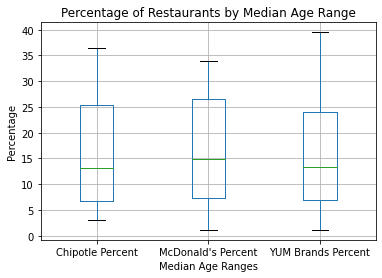

In [216]:
percent_rest_df.boxplot()
plt.xlabel("Median Age Ranges")
plt.ylabel("Percentage")
plt.title('Percentage of Restaurants by Median Age Range')
plt.show()

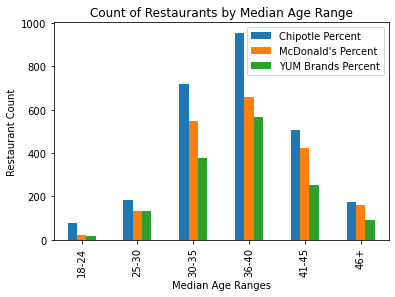

In [217]:
#Create bar plot fpr restaurant count in each age range

count_rest_df = pd.DataFrame({"Chipotle Percent": chipotle_age_df['Total Count'],
                           "McDonald's Percent": mcdonalds_age_df["Total Count"],
                          "YUM Brands Percent": yum_age_df["Total Count"]}, index=group_names)
count_rest_df.plot(kind='bar')
plt.xlabel("Median Age Ranges")
plt.ylabel("Restaurant Count")
plt.title('Count of Restaurants by Median Age Range')
plt.show()